In [32]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_path = "data/NFLX.csv"

# CSV 파일 읽어오기 (첫 번째, 마지막 열 제외)
df = pd.read_csv(csv_path, usecols=['Date', 'Open', 'High', 'Low', 'Close'])

# 날짜 데이터 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2021년 이후 데이터 필터링
df_after_2021 = df[df["Date"] >= "2021"]

df_after_2021

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [46]:
# df_monthly_average_close = df_after_2021.groupby(df_after_2021['Date'])['Close'].mean()

monthly_average = df_after_2021.set_index('Date').resample('M')['Close'].mean()

In [49]:
df_monthly_average = pd.DataFrame(monthly_average)
df_monthly_average = df_monthly_average.reset_index()
df_monthly_average

,Date,Close
0,2021-01-31,526.816845
1,2021-02-28,548.959999
2,2021-03-31,518.123482
3,2021-04-30,533.136662
4,2021-05-31,496.714497
5,2021-06-30,503.324091
6,2021-07-31,528.653330
7,2021-08-31,532.346817
8,2021-09-30,590.795239
9,2021-10-31,642.202849


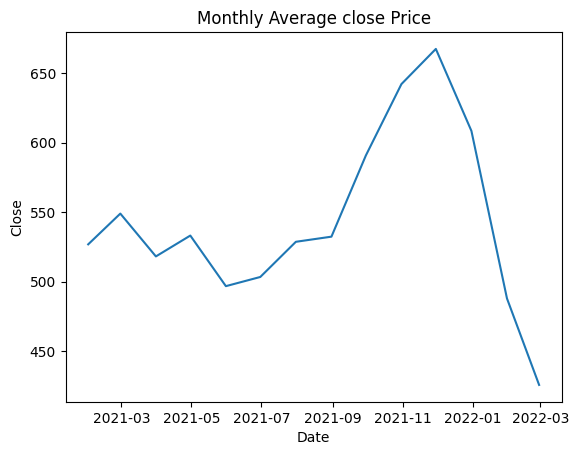

In [50]:
plt.plot(df_monthly_average['Date'], df_monthly_average['Close'])

# 그래프 제목 설정
plt.title('Monthly Average close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close')

plt.show()